# Exercise Set 1

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

In [25]:
os.makedirs('media', exist_ok=True)

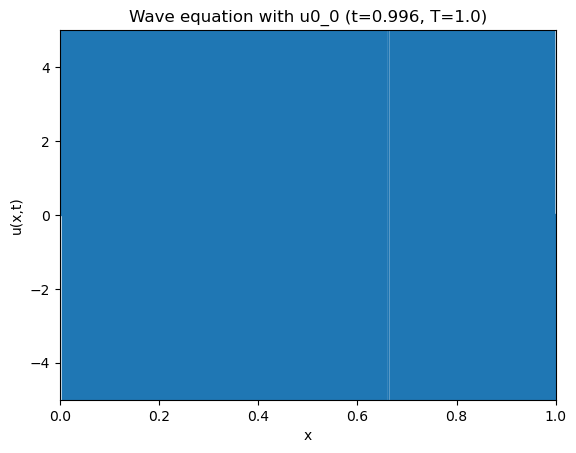

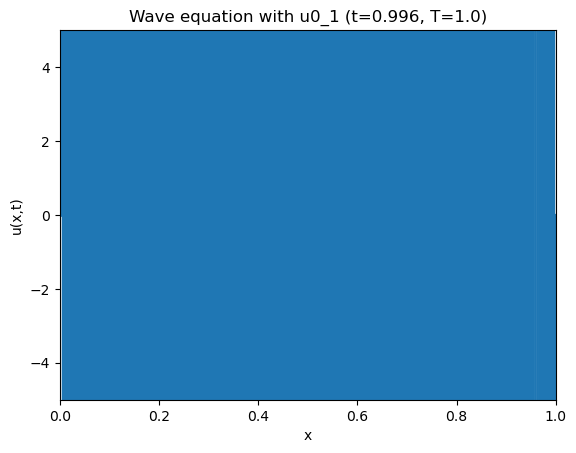

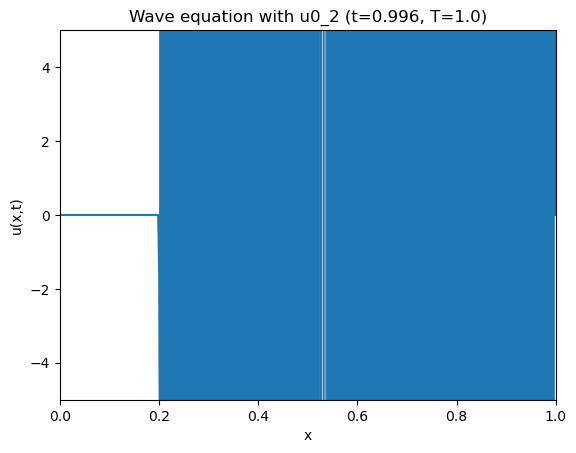

In [27]:
def simulate_wave_equation(u0, L=1.0, c=1.0, T=1.0, Nx=100, Nt=100):
    dx = L/Nx
    dt = T/Nt

    # u(x,t)
    u = np.zeros((Nx, Nt))


    # Initial conditions
    x = np.linspace(0, L, Nx)
    u[:,0] = u0(x)

    # Physical boundaries at x=0 and x=L
    u[0,:] = 0
    u[-1,:] = 0

    # Stepping through time
    for x in range(1, Nx-1):
        for t in range(1, Nt-1):
            u[x, t] = c**2 * dt**2/dx**2 * (u[x+1, t-1] + u[x-1, t-1] - 2*u[x, t-1]) - u[x, t-2] + 2*u[x, t-1]
    
    return u

def animate_wave_equation(u, title, L=1.0, T=1.0):
    fig, ax = plt.subplots()
    x = np.linspace(0, L, u.shape[0])
    plt.xlim(0, L)
    plt.ylim(-5, 5)
    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    line, = ax.plot(x, u[:,0])

    def animate(i):
        line.set_ydata(u[:,i])
        plt.title(title + f' (t={i/u.shape[1]*T:.3f}, T={T})')
        return line,

    anim = animation.FuncAnimation(fig, animate, frames=u.shape[1]-1, blit=True, interval=1000//(u.shape[1]/5), repeat=True)
    anim.save(f'media/{title.strip().replace(" ", "_")}.mp4', writer='ffmpeg')

u0s = [
    lambda x: np.sin(2*np.pi*x),
    lambda x: np.sin(5*np.pi*x),
    lambda x: np.where((0.2 < x) & (x < 0.4), np.sin(5*np.pi*x), 0)
]

for i, u0 in enumerate(u0s):
    u = simulate_wave_equation(u0, Nx=500, Nt=500, T=1.0)
    animate_wave_equation(u, title=f'Wave equation with u0_{i}')
